In [2]:
# @title Dimension Reduction Technique Exersice 1 Missing value

import pandas as pd
import numpy as np
import csv

# read the data
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flights.csv")

# Note: The path of the file should be added while reading the data.

# Now, we will check the percentage of missing values in each variable. We can use .isnull().sum() to calculate this.

print(train.head())

# As you can see in the above table, there aren’t too many missing values (just 2 variables have them actually). We can impute the values using appropriate methods, or we can set a threshold of, say 20%, and remove the variable having more than 20% missing values. Let’s look at how this can be done in Python:

# saving missing values in a variable
a = train.isnull().sum()/len(train)*100
print(a)

# saving column names in a variable
variables = train.columns
print(variables)
variable = [ ]
for i in range(0,12):
   if a[i]<=20:   #setting the threshold as 20%
      variable.append(variables[i])

#So the variables to be used are stored in “variable”, which contains only those features where the missing values are less than 20%.
 #print (variable)
#Let us drop the Outlet_Size column

train = train.drop(columns=['arr_delay'])
train = train.drop(columns=['air_time'])

# Let’s first impute the missing values in the arr_time column using the median value of the known arr_time observations.

train['arr_time'].fillna(train['arr_time'].median(), inplace=True)

train.isnull().sum()/len(train)*100

   id  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0   0  2013      1    1       517             515          2     830.0   
1   1  2013      1    1       533             529          4     850.0   
2   2  2013      1    1       542             540          2     923.0   
3   3  2013      1    1       544             545         -1    1004.0   
4   4  2013      1    1       554             600         -6     812.0   

   sched_arr_time  arr_delay  ... flight  tailnum origin dest air_time  \
0             819       11.0  ...   1545   N14228    EWR  IAH    227.0   
1             830       20.0  ...   1714   N24211    LGA  IAH    227.0   
2             850       33.0  ...   1141   N619AA    JFK  MIA    160.0   
3            1022      -18.0  ...    725   N804JB    JFK  BQN    183.0   
4             837      -25.0  ...    461   N668DN    LGA  ATL    116.0   

   distance  hour  minute         time_hour                    name  
0      1400     5      15  01-01-2013 05

id                0.0
year              0.0
month             0.0
day               0.0
dep_time          0.0
sched_dep_time    0.0
dep_delay         0.0
arr_time          0.0
sched_arr_time    0.0
carrier           0.0
flight            0.0
tailnum           0.0
origin            0.0
dest              0.0
distance          0.0
hour              0.0
minute            0.0
time_hour         0.0
name              0.0
dtype: float64

In [3]:
# @title Low variance

#  would like to suppress scientific notation for all floats, is to adjust the pandas options.
pd.options.display.float_format = '{:.2f}'.format

#Now let’s calculate the variance of all the numerical variables.
print(train.var())

numeric = train[['dep_time', 'sched_dep_time','dep_delay','arr_time','sched_arr_time', 'distance']]

var = numeric.var()
# print(len(var))

numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=10:   #setting the threshold as 10%
       variable.append(numeric[i])

print(variable)



id               8328543.07
year                   0.00
month                  0.00
day                   10.77
dep_time          229852.58
sched_dep_time    221393.05
dep_delay           1114.83
arr_time          259163.40
sched_arr_time    245099.24
flight           2703586.43
distance          520095.24
hour                  22.04
minute               367.83
dtype: float64
['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'distance']


<ipython-input-3-7c724900cf07>:7: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train.var())


In [4]:
# @title High correlation

train.corr()

<ipython-input-4-4a950163be65>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,flight,distance,hour,minute
id,1.00,NaN,NaN,1.00,0.01,0.02,-0.10,0.01,0.02,0.03,-0.04,0.02,-0.03
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1.00,NaN,NaN,1.00,-0.08,-0.06,-0.12,-0.06,-0.05,0.02,-0.03,-0.06,-0.03
dep_time,0.01,NaN,NaN,-0.08,1.00,0.97,0.14,0.73,0.79,0.06,-0.04,0.97,0.09
sched_dep_time,0.02,NaN,NaN,-0.06,0.97,1.00,0.09,0.72,0.78,0.05,-0.04,1.00,0.07
dep_delay,-0.10,NaN,NaN,-0.12,0.14,0.09,1.00,0.05,0.08,0.04,0.02,0.09,0.03
arr_time,0.01,NaN,NaN,-0.06,0.73,0.72,0.05,1.00,0.89,0.05,0.06,0.72,0.03
sched_arr_time,0.02,NaN,NaN,-0.05,0.79,0.78,0.08,0.89,1.00,0.04,0.06,0.78,0.04
flight,0.03,NaN,NaN,0.02,0.06,0.05,0.04,0.05,0.04,1.00,-0.48,0.05,-0.00


<ipython-input-5-08d1ecd6334d>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=train.drop('dep_time', 1)


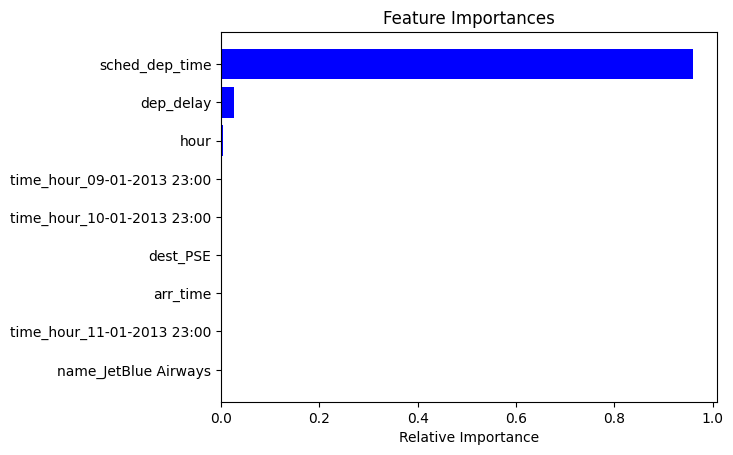

In [5]:
# @title Feature importance

import matplotlib.pyplot as plt

# We will drop the dependent variable (dep_time) as the correlation with other values are high first and save the remaining variables in a new dataframe (df).
df=train.drop('dep_time', 1)

# We need to convert the data into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs.
# Let’s also drop the ID variables (id, year, month and day) as these are just unique numbers and hold no significant importance for us currently.



from sklearn.ensemble import RandomForestRegressor

df=df.drop(['id', 'year', 'month', 'day'], axis=1)
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.dep_time)

#After fitting the model, plot the feature importance graph:

features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



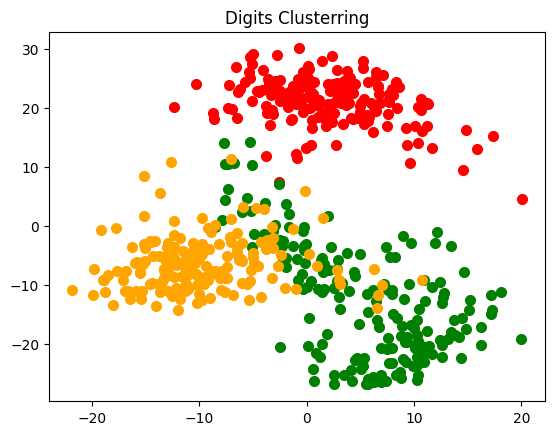

In [6]:
# @title Exersice 2 - Clustering Plant Iris Using Principal component Analysis

from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()
X, y = digits.data, digits.target
names = digits.target_names

from sklearn.decomposition import PCA
model = PCA(n_components=2) #Number of components to keep
y_means = model.fit(X).transform(X)

plt.figure()
colors = ['red', 'green', 'orange']

for color, i, target_name in zip(colors, [0, 1, 2], names):
    plt.scatter(y_means[y == i, 0], y_means[y == i, 1], color=color, lw = 2, label=target_name)
plt.title('Digits Clusterring')
plt.show()
